In [1]:
# Simple Linear Regression 
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

# This is used to show the data graphs within the notebook
%matplotlib inline

# reading the data
df = pd.read_csv("FuelConsumption.csv")
df.head()

'wget' is not recognized as an internal or external command,
operable program or batch file.


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [2]:
# Data Exploration
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [3]:
# Feature selection
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<Axes: >

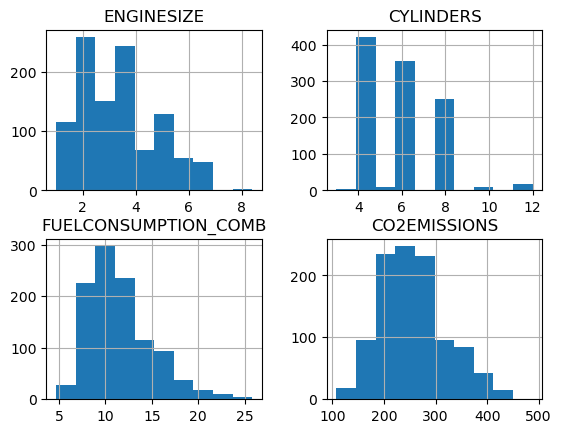

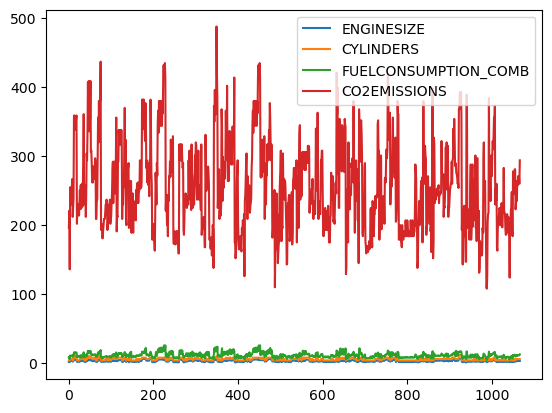

In [4]:
# Visulizing the selected data
viz = cdf
viz.hist()
viz.plot()

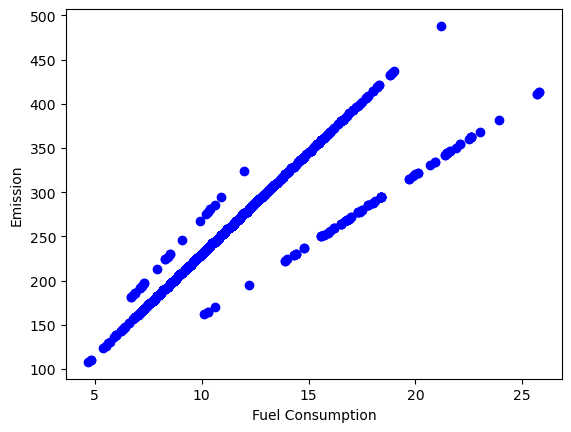

In [5]:
# Now, lets plot each of these features vs the Emission, to see how linear is their relation
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue")

plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

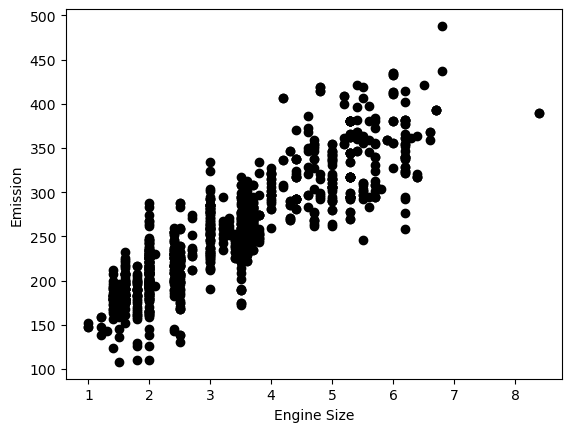

In [8]:
# Plotting other features against the Emission
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "black")

plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

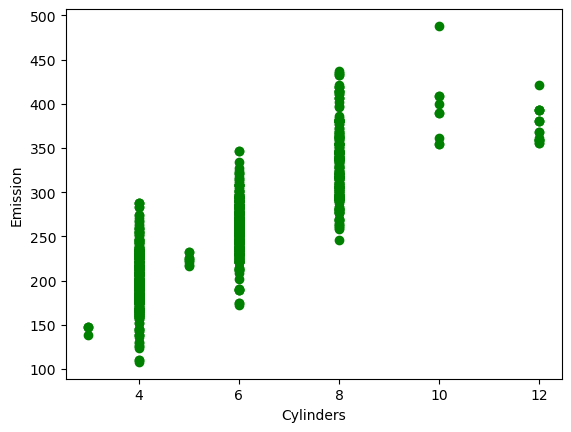

In [7]:
# Plotting Cylinders against emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = "green")

plt.xlabel("Cylinders")
plt.ylabel("Emission")

plt.show()

In [10]:
# Creating & Splitting the test/train dataset by masking.
# 80% training dataset while the left will be test set

rands = np.random.rand(len(df))
msk = rands < 0.8
inverted_msk = rands >= 0.8
# Splitting the data
train = cdf[msk]
test = cdf[inverted_msk]


In [11]:
# Simple Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()

# getting data ready to be trained 
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

# Training the data / fitting the line of best fit
regr.fit(train_x, train_y)

# Coefficients 
intercept = float(regr.intercept_[0])
slope = (regr.coef_[0])


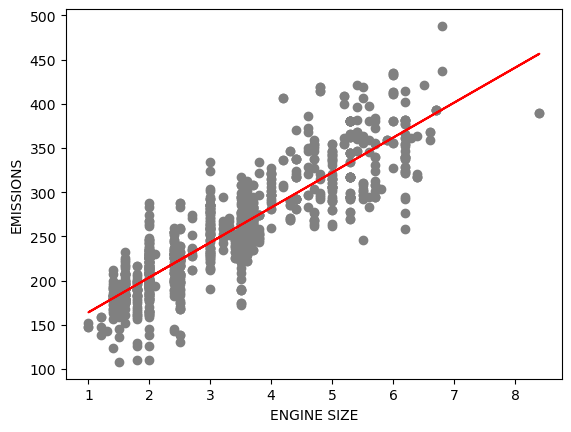

In [13]:
# Plotting the line of the best fit
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="gray")
plt.plot(train_x, intercept + slope*train_x, "r-")

plt.xlabel("ENGINE SIZE")
plt.ylabel("EMISSIONS")

plt.show()

In [15]:
# Model Efficiency evaluation through eval_metrics
from sklearn.metrics import r2_score 

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

# predicting for test through trained model
test_y_hat = regr.predict(test_x)

# Errors
MAE = np.mean(np.absolute(test_y_hat - test_y))
MSE = np.mean((test_y_hat - test_y) ** 2)
RMSE = np.sqrt(MSE)
R_squared = r2_score(test_y_hat, test_y)

# printing the Metrics
print("Mean Absolute ERROR| {:.2f}".format(MAE))
print("Mean Sqruared ERROR| {:.2f}".format(MSE))
print("Root Mean SqrdERROR| {:.2f}".format(RMSE))
print("R_squared Score    | {:.2f}".format(R_squared))



Mean Absolute ERROR| 22.58
Mean Sqruared ERROR| 847.33
Root Mean SqrdERROR| 29.11
R_squared Score    | 0.75
